# Document Splitting

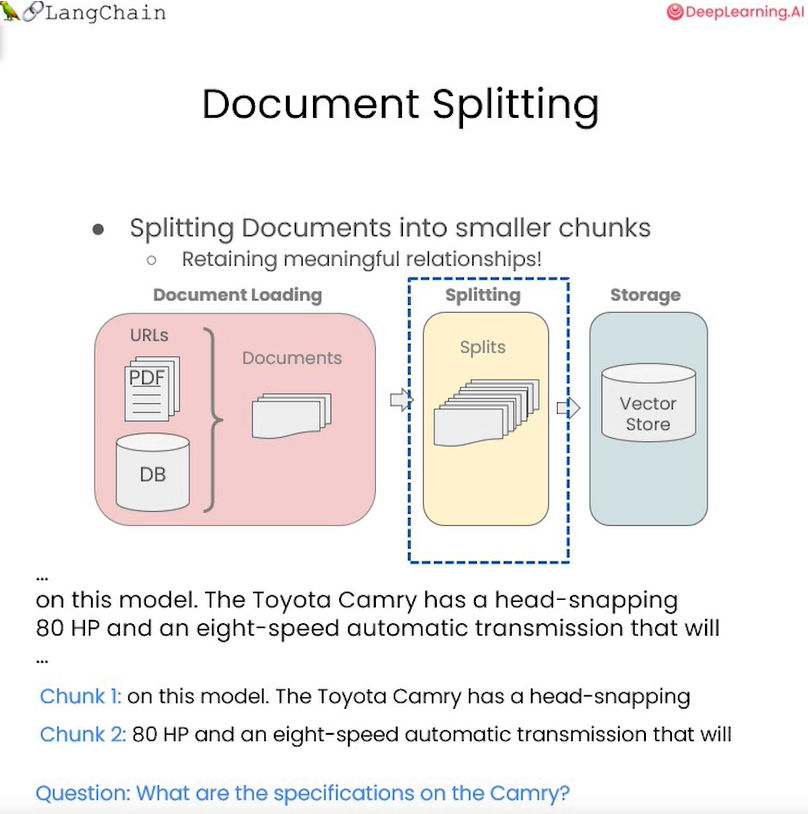

###############################################################################################################################

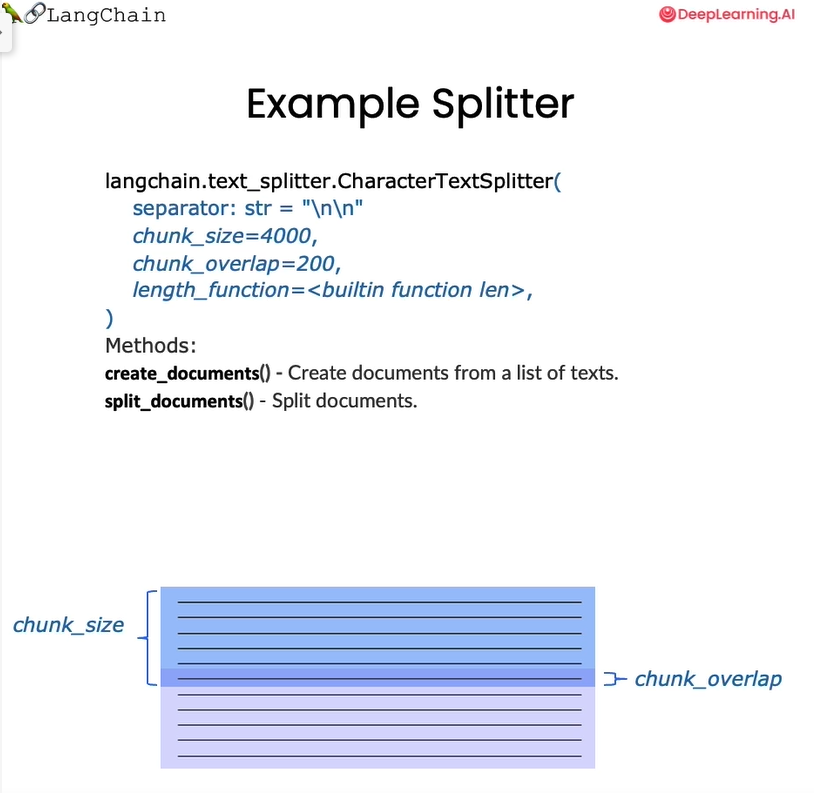

###############################################################################################################################

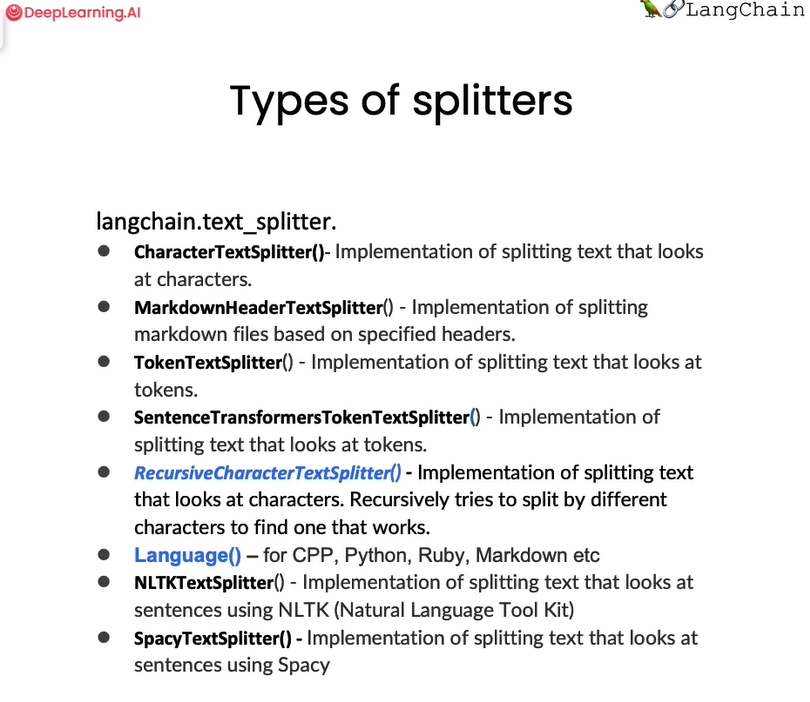

In [ ]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [ ]:
chunk_size =26
chunk_overlap = 4

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap
)

Why doesn't this split the string below?

In [ ]:
text1 = 'abcdefghijklmnopqrstuvwxyz'

In [ ]:
r_splitter.split_text(text1)

In [ ]:
text2 = 'abcdefghijklmnopqrstuvwxyzabcdefg'

In [ ]:
r_splitter.split_text(text2)

Ok, this splits the string but we have an overlap specified as 5, but it looks like 3? (try an even number)

In [ ]:
text3 = "a b c d e f g h i j k l m n o p q r s t u v w x y z"

In [ ]:
r_splitter.split_text(text3)

In [ ]:
c_splitter.split_text(text3)

In [ ]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)
c_splitter.split_text(text3)

Try your own examples!

## Recursive splitting details

`RecursiveCharacterTextSplitter` is recommended for generic text. 

In [ ]:
some_text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

In [ ]:
len(some_text)

In [ ]:
c_splitter = CharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0,
    separator = ' '
)
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=450,
    chunk_overlap=0, 
    separators=["\n\n", "\n", " ", ""]
)

In [ ]:
c_splitter.split_text(some_text)

In [ ]:
r_splitter.split_text(some_text)

Let's reduce the chunk size a bit and add a period to our separators:

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "\. ", " ", ""]
)
r_splitter.split_text(some_text)

In [ ]:
r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=150,
    chunk_overlap=0,
    separators=["\n\n", "\n", "(?<=\. )", " ", ""]
)
r_splitter.split_text(some_text)

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [ ]:
from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator="\n",
    chunk_size=1000,
    chunk_overlap=150,
    length_function=len
)

In [ ]:
docs = text_splitter.split_documents(pages)

In [ ]:
len(docs)

In [ ]:
len(pages)

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
loader = NotionDirectoryLoader("docs/Notion_DB")
notion_db = loader.load()

In [ ]:
docs = text_splitter.split_documents(notion_db)

In [ ]:
len(notion_db)

In [ ]:
len(docs)

## Token splitting

We can also split on token count explicity, if we want.

This can be useful because LLMs often have context windows designated in tokens.

Tokens are often ~4 characters.

In [ ]:
from langchain.text_splitter import TokenTextSplitter

In [ ]:
text_splitter = TokenTextSplitter(chunk_size=1, chunk_overlap=0)

In [ ]:
text1 = "foo bar bazzyfoo"

In [ ]:
text_splitter.split_text(text1)

In [ ]:
text_splitter = TokenTextSplitter(chunk_size=10, chunk_overlap=0)

In [ ]:
docs = text_splitter.split_documents(pages)

In [ ]:
docs[0]

In [ ]:
pages[0].metadata

## Context aware splitting

Chunking aims to keep text with common context together.

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [ ]:
from langchain.document_loaders import NotionDirectoryLoader
from langchain.text_splitter import MarkdownHeaderTextSplitter

In [ ]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

In [ ]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

In [ ]:
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)

In [ ]:
md_header_splits[0]

In [ ]:
md_header_splits[1]

Try on a real Markdown file, like a Notion database.

In [ ]:
loader = NotionDirectoryLoader("docs/Notion_DB")
docs = loader.load()
txt = ' '.join([d.page_content for d in docs])

In [ ]:
headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
]
markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)

In [ ]:
md_header_splits = markdown_splitter.split_text(txt)

In [ ]:
md_header_splits[0]